In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

# Understanding large odds

In a recent [paper](https://arxiv.org/abs/1610.03508) we found an odds between two models of
$$ \mathcal{O} = \frac{P(\textrm{model 1})}{P(\textrm{model 2})} \approx 10^{72} $$
in this post I will discuss how such large numbers can be produced by the accumulated effect of many data points, each giving a moderate amount of evidence in favour of one model.

Firstly, note that the odds are equivalent to the Bayes factor, provided we set our prior odds to unity (i.e. no preference between the two models). As such, we are interested in

$$
\mathcal{O} = \frac{P(\textrm{model 1}|\textrm{ data})}{P(\textrm{model 2}|\textrm{ data})}
$$

## Two Gaussian models

Let's take a simple example where we have some data consisting of $N$ observations $x_{i}$ where $i \in [1, N]$. Then we state two models and say that the probability of model 1 is a Gaussian distribution with mean $\mu_1$ and standard-deviation $\sigma$, i.e.
$$P(\textrm{model 1}| \; \{x_i\}) = \prod_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma^{2}}}
e^{\frac{(\mu_1 - x_i)^{2}}{2\sigma^{2}}}
$$

while model 2 is also a Gaussian with a different mean $\mu_2$, but the same standard deviation
$\sigma$. Here is a simple sketch of the two models:

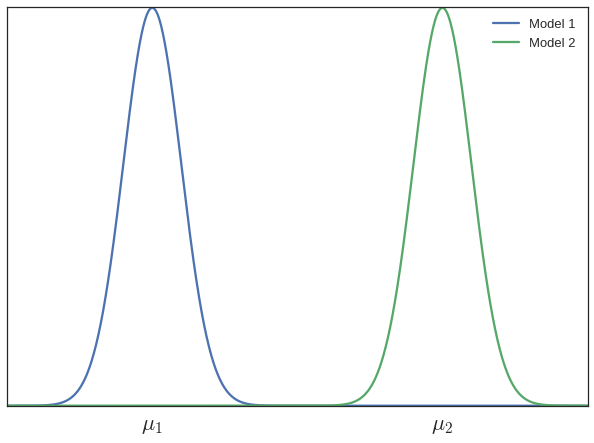

In [21]:
xvals = np.linspace(0, 20, 1000)
mu1 = 5
mu2 = 15
fig, ax = plt.subplots()
ax.plot(xvals, stats.norm.pdf(xvals, loc=mu1, scale=1), label='Model 1')
ax.plot(xvals, stats.norm.pdf(xvals, loc=mu2, scale=1), label='Model 2')
ax.set_xticks([mu1, mu2])
ax.set_yticks([])
ax.set_xticklabels(['$\mu_1$', '$\mu_2$'], size=22)
ax.legend(loc='best', frameon=False)
plt.show()

The log-odds ratio, conditioned on the data, between these two models can be written as

$$
\log \mathcal{O} = \frac{1}{2\sigma^{2}}\sum_{i=1}^{N}
\left[(x_i - \mu_2)^{2} - (x_i - \mu_1)^2\right].
$$

Defining $\langle . \rangle$ as the mean then we have

$$
\log \mathcal{O} = \frac{N}{2\sigma^{2}}
\left[\langle(x_i - \mu_2)^{2}\rangle - \langle(x_i - \mu_1)^2\rangle\right].
$$

The quantity in the square brackets is the difference between the variance of each model, assuming the given fixed mean of each model, which we define to be

$$
\Delta = \left[\langle(x_i - \mu_2)^{2}\rangle - \langle(x_i - \mu_1)^2\rangle\right],
$$

such that

$$
\log_{10}\mathcal{O} = \frac{N\Delta}{2\sigma^{2}\log(10)}
$$

This demonstrates a linear scaling of the log-odds with the number of observations. But, is complicated by the $\Delta$.

## Fixed observations

Let us now consider that all $N$ $x_i$ values are exactly the same value, $x_0=\mu_1$ and let $\mu_2 = n\sigma$ i.e. the mean of the two models are separated by a fixed number of standard-deviations. This is obviously unlike real data, but allows us to gain some simple intuition. In such a case,

$$
\Delta = (\mu_1 - \mu_2)^{2} = n^{2}\sigma^{2}
$$

such that

$$
\log_{10}\mathcal{O} = \frac{N n^{2}}{\log_{10}}
$$

This result allows us to reflect on how large odds can be easily result provided $N\gtrsim 1/n^{2}$, which is the case when the two distributions are distinctly separated and there are a few hundres data points $N$.

To help illustrate this specific case, here is an illustration. The vertical line demonstrates where the $N$ data point are:

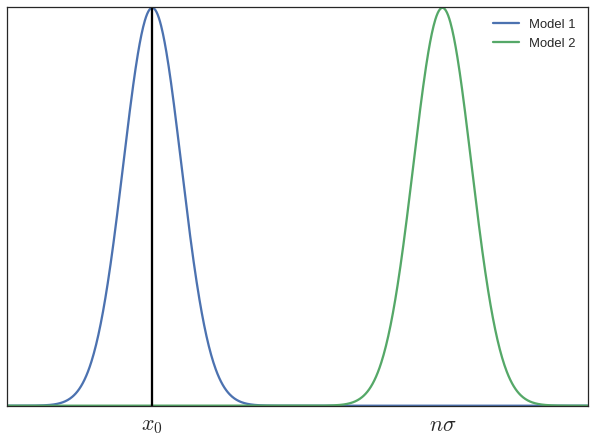

In [4]:
xvals = np.linspace(0, 20, 1000)
mu1 = 5
mu2 = 15
fig, ax = plt.subplots()
ax.plot(xvals, stats.norm.pdf(xvals, loc=mu1, scale=1), label='Model 1')
ax.plot(xvals, stats.norm.pdf(xvals, loc=mu2, scale=1), label='Model 2')
ax.set_xticks([mu1, mu2])
ax.set_yticks([])
ax.set_xticklabels(['$x_0$', '$n\sigma$'], size=22)
ax.axvline(mu1, color='k')
ax.legend(loc='best', frameon=False)
plt.show()